# Chapter 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

## Problem 8.8

### 8.8 (a)

In [3]:
from ISLP import load_data
from sklearn.model_selection import train_test_split

In [4]:
df = load_data("Carseats")
df['Urban'] = df.apply(lambda r: 1 if r.Urban == 'Yes' else 0, axis=1)
df['US'] = df.apply(lambda r: 1 if r.US == 'Yes' else 0, axis=1)
df['ShelveLoc'] = df.apply(
    lambda r: 1 if r.ShelveLoc == 'Good' else (0 if r.ShelveLoc == 'Medium' else -1), axis=1
    )
X = df.iloc[:, 1:]
Y = df['Sales']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, random_state=0)

### 8.8(b)

In [6]:
from sklearn import tree

In [7]:
model = tree.DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

Regressioin tree with the maximal depth 5


[Text(0.5225409836065574, 0.9166666666666666, 'ShelveLoc <= 0.5\nsquared_error = 8.438\nsamples = 280\nvalue = 7.378'),
 Text(0.26229508196721313, 0.75, 'ShelveLoc <= -0.5\nsquared_error = 6.26\nsamples = 226\nvalue = 6.705'),
 Text(0.13114754098360656, 0.5833333333333334, 'Price <= 102.5\nsquared_error = 5.251\nsamples = 71\nvalue = 5.159'),
 Text(0.06557377049180328, 0.4166666666666667, 'Income <= 84.0\nsquared_error = 4.795\nsamples = 21\nvalue = 6.697'),
 Text(0.03278688524590164, 0.25, 'Age <= 47.0\nsquared_error = 3.703\nsamples = 12\nvalue = 5.599'),
 Text(0.01639344262295082, 0.08333333333333333, 'squared_error = 0.961\nsamples = 4\nvalue = 7.61'),
 Text(0.04918032786885246, 0.08333333333333333, 'squared_error = 2.041\nsamples = 8\nvalue = 4.594'),
 Text(0.09836065573770492, 0.25, 'Age <= 32.0\nsquared_error = 2.501\nsamples = 9\nvalue = 8.161'),
 Text(0.08196721311475409, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 11.67'),
 Text(0.11475409836065574, 0.0833

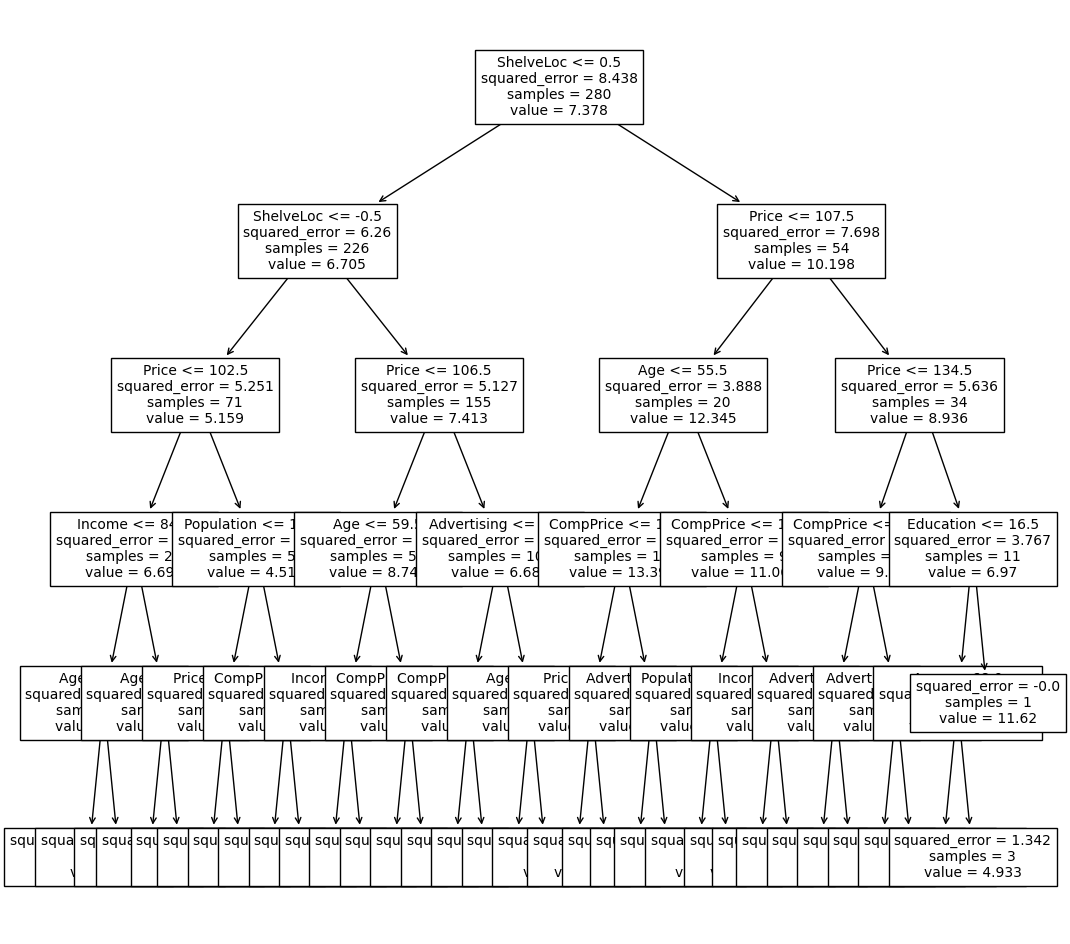

In [8]:
feature_names = X_train.columns
_, ax = plt.subplots(figsize = (12,12))
print("Regressioin tree with the maximal depth 5")
tree.plot_tree(model, feature_names=feature_names, fontsize=10)

In [9]:
print(f"""
      From the trained tree, we can see that the -ShelveLoc- plays a crucial role in decisions.
      The predictor -price- was expected as the most important feature before analyzing data.
      However, it seemed to have the strongest effect only when the -ShelveLoc- requirement is satisfied first.
      """)


      From the trained tree, we can see that the -ShelveLoc- plays a crucial role in decisions.
      The predictor -price- was expected as the most important feature before analyzing data.
      However, it seemed to have the strongest effect only when the -ShelveLoc- requirement is satisfied first.
      


In [10]:
Y_hat =  model.predict(X_test)
print(f"The test MSE = {np.mean((Y_hat - Y_test)**2)}")

The test MSE = 4.085906684240591


### 8.8 (c)

In [11]:
import sklearn.model_selection as skm

In [12]:
ccp_path = model.cost_complexity_pruning_path(X_train, Y_train)
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(model,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                       refit=True,
                       cv=kfold,
                       scoring='neg_mean_squared_error')
G = grid.fit(X_train, Y_train)

In [13]:
best_ = grid.best_estimator_
print(f'sklearn kfold specification: {kfold}')
print(f'Test MSE from the optimal complexity tree = {np.mean((Y_test - best_.predict(X_test))**2)}')
print(f'The optimal test MSE was lower than the one from the previous tree.')
print(f'Therefore I concluded that pruning improved the test MSE.')

sklearn kfold specification: KFold(n_splits=5, random_state=0, shuffle=True)
Test MSE from the optimal complexity tree = 3.7669118230400485
The optimal test MSE was lower than the one from the previous tree.
Therefore I concluded that pruning improved the test MSE.


### 8.8(d)

In [14]:
from sklearn.ensemble import RandomForestRegressor as RF

In [15]:
print("By setting max_features of Random forest = X_train.shape[1], we can apply bagging.")
model = RF(max_features=X_train.shape[1], random_state = 0)
model.fit(X_train, Y_train)

By setting max_features of Random forest = X_train.shape[1], we can apply bagging.


RandomForestRegressor(max_features=10, random_state=0)

Test MSE from bagging model = 2.086159133250001


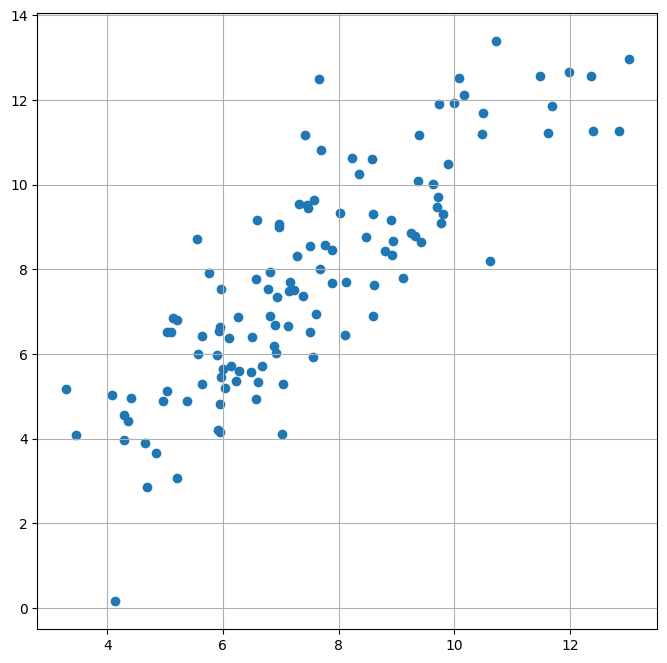

In [16]:
_, ax = plt.subplots(figsize = (8,8))
Y_hat = model.predict(X_test)
print(f"Test MSE from bagging model = {np.mean((Y_hat - Y_test)**2)}")
ax.scatter(Y_hat, Y_test)
ax.grid()

In [17]:
feature_imp = pd.DataFrame({'importance': model.feature_importances_}, index = feature_names)
feature_imp = feature_imp.sort_values(by = 'importance', ascending = False)
print(feature_imp)

             importance
ShelveLoc      0.308911
Price          0.277988
Age            0.104521
CompPrice      0.098358
Advertising    0.073302
Income         0.052792
Population     0.042880
Education      0.031541
US             0.005423
Urban          0.004284


<Axes: >

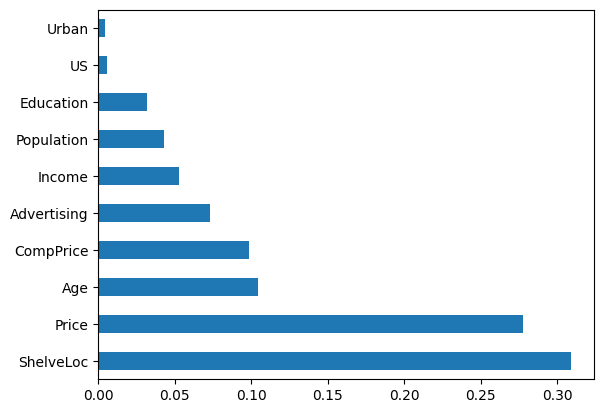

In [18]:
feature_imp['importance'].plot(kind = 'barh')

### 8.8(e)
Below function was used to fitting data with max_features = m repeatedly.
The range of m is from 1 to X_train.shape[1].
```
def rf_mse(m):
    rf = RF(max_features=m, random_state = 0)
    rf.fit(X_train, Y_train)
    Y_hat = rf.predict(X_test)
    mse = np.mean((Y_hat - Y_test)**2)
    return mse
```

In [19]:
def rf_mse(max_features):
    rf = RF(max_features=max_features, random_state=0)
    rf.fit(X_train, Y_train)
    Y_hat = rf.predict(X_test)
    mse = np.mean((Y_hat - Y_test)**2)
    return mse

In [20]:
test_MSE = []
for m in range(1, X_train.shape[1] + 1):
    test_MSE.append(rf_mse(m))

As m goes to 10, the test MSE decreased even though it was not monotone.
In other words, as the random forest is getting closer to the bagging model,
it showed improved performance in test set.


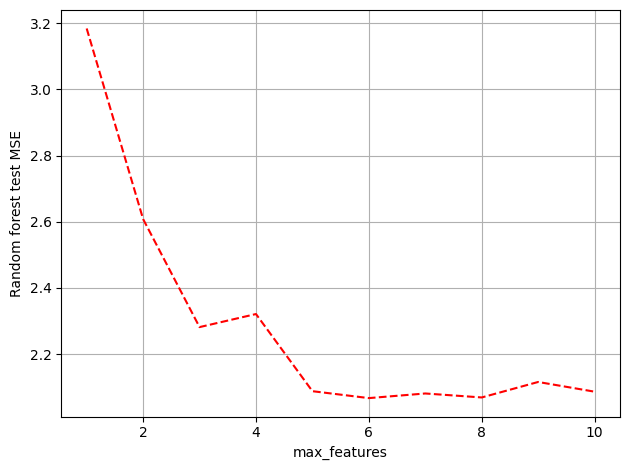

In [21]:
print("As m goes to 10, the test MSE decreased even though it was not monotone.")
print("In other words, as the random forest is getting closer to the bagging model,")
print("it showed improved performance in test set.")
plt.plot(np.arange(1, X_train.shape[1] + 1), test_MSE, '--', color='red')
plt.xlabel("max_features")
plt.ylabel("Random forest test MSE")
plt.grid()
plt.tight_layout()
plt.show()

In [22]:
print("The random forest with m = p^(1/2), which is the typical value for m, showed below feature importance.")
model = RF(max_features= int(np.sqrt(X_train.shape[1])), random_state = 0)
model.fit(X_train, Y_train)
feature_imp = pd.DataFrame({'importance': model.feature_importances_}, index = feature_names)
feature_imp = feature_imp.sort_values(by = 'importance', ascending = False)
print(feature_imp)

The random forest with m = p^(1/2), which is the typical value for m, showed below feature importance.
             importance
Price          0.236728
ShelveLoc      0.226816
Age            0.124406
CompPrice      0.092115
Advertising    0.087447
Income         0.084161
Population     0.074774
Education      0.049047
US             0.014767
Urban          0.009738


<Axes: >

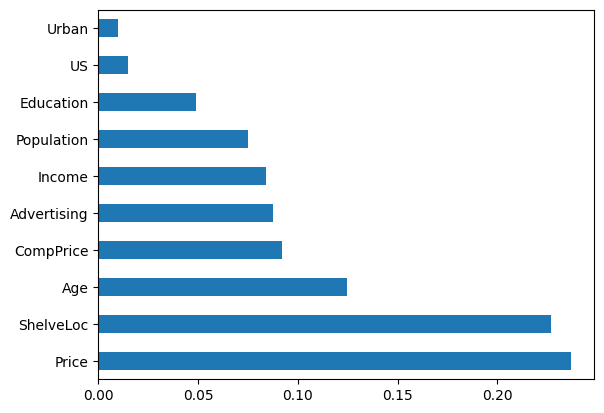

In [23]:
feature_imp['importance'].plot(kind = 'barh')

### 8.8(f)
There was an issue on ```BART.predict()```.
- https://github.com/intro-stat-learning/ISLP/issues/9
- The issue was notified by a maintainer on 10th of November. I followed the temporary troubleshooting that the maintainer suggested in above link, so the below code may not be working after the bug is fixed. 

In [24]:
from ISLP.bart import BART

In [25]:
model = BART(random_state=0, burnin=5, ndraw=15)
model.fit(X_train, Y_train)

BART(burnin=5, ndraw=15, random_state=0)

In [26]:
Y_hat = model.predict(np.asarray(X_test))
print(f"Test MSE from the BART model = {np.mean((Y_hat - Y_test)**2)}")
print("Among all models, the BART model showed the best performance in test set.")

Test MSE from the BART model = 1.604292380339006
Among all models, the BART model showed the best performance in test set.


## Problem 8.11

### 8.11 (a)

In [27]:
df = load_data("Caravan")
df['Purchase'] = df.apply(lambda r : 1 if r.Purchase == 'Yes' else 0,axis = 1)

In [28]:
df_train = df.iloc[:1000,:]
df_test = df.iloc[1000:,:]

In [29]:
X_train = df_train.iloc[:,:-1]
Y_train = df_train.Purchase

X_test = df_test.iloc[:,:-1]
Y_test = df_test.Purchase

### 8.11(b)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [31]:
model = GBC(
    n_estimators=1000, learning_rate=0.01, max_depth=3, random_state=0
    )
model.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,
                           random_state=0)

Below horizontal bar chart shows the features with 20 largest feature importances.
To see the importances clearly, I cutted the feature with almost zero importacne out.
-PPERSAUT- was the most important feature according to the boosting model.


<Axes: >

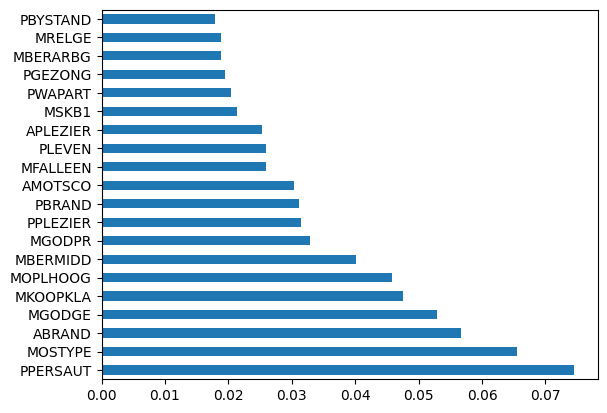

In [32]:
print("Below horizontal bar chart shows the features with 20 largest feature importances.")
print("To see the importances clearly, I cutted the feature with almost zero importacne out.")
print("-PPERSAUT- was the most important feature according to the boosting model.")
feature_imp = pd.DataFrame({'importance':model.feature_importances_}, index = X_train.columns)
feature_imp = feature_imp.sort_values(by = 'importance', ascending = False)
feature_imp['importance'].nlargest(20).plot(kind= 'barh')

### 8.11(c)

In [33]:
from ISLP import confusion_table
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
Y_hat = model.predict_proba(X_test)[:,1] > 0.2

In [35]:
print("=== Boosting Classifier ===")
table = confusion_table(Y_hat, Y_test)
print(table)

=== Boosting Classifier ===
Truth         0    1
Predicted           
0          4336  251
1           197   38


In [36]:
print(
    f"""
    According to the confusion matrix,
    the fraction of the people
    (truly make a purchase) over (predicted to make a purchase)
    is {table.iloc[1,1]/(table.iloc[1,1] + table.iloc[1,0])}
    """
    )


    According to the confusion matrix,
    the fraction of the people
    (truly make a purchase) over (predicted to make a purchase)
    is 0.16170212765957448
    


In [37]:
print("=== KNN classifier ===")
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)
Y_hat = model.predict_proba(X_test)[:,1] > 0.2
table_KNN = confusion_table(Y_hat, Y_test)
print(table_KNN)

=== KNN classifier ===
Truth         0    1
Predicted           
0          3761  216
1           772   73


In [38]:
print(
    f"""
    According to the confusion matrix,
    the fraction of the people
    (truly make a purchase) over (predicted to make a purchase)
    is {table_KNN.iloc[1,1]/(table_KNN.iloc[1,1] + table_KNN.iloc[1,0])}.
    KNN showed deteriorated performance in this case.
    """
    )


    According to the confusion matrix,
    the fraction of the people
    (truly make a purchase) over (predicted to make a purchase)
    is 0.0863905325443787.
    KNN showed deteriorated performance in this case.
    


In [39]:
print("=== Logisitic Regressin classifier ===")
model = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, Y_train)
Y_hat = model.predict_proba(X_test)[:,1] > 0.2
table_Log = confusion_table(Y_hat, Y_test)
print(table_Log)

=== Logisitic Regressin classifier ===
Truth         0    1
Predicted           
0          4292  238
1           241   51


In [40]:
print(
    f"""
    According to the confusion matrix,
    the fraction of the people
    (truly make a purchase) over (predicted to make a purchase)
    is {table_Log.iloc[1,1]/(table_Log.iloc[1,1] + table_Log.iloc[1,0])}.
    KNN showed slightly better performance in this case.
    """
    )


    According to the confusion matrix,
    the fraction of the people
    (truly make a purchase) over (predicted to make a purchase)
    is 0.17465753424657535.
    KNN showed slightly better performance in this case.
    


# Chapter 11

## problem 11.11

### 11.11 (a)

In [41]:
from lifelines import (KaplanMeierFitter, CoxPHFitter)
from lifelines.statistics import logrank_test

In [42]:
Y = [26.5, 37.2, 57.3, 90.8, 20.2, 89.8]
indicator = [1, 1, 1, 0, 0, 0]
X = [0.1, 11, -0.3, 2.8, 1.8, 0.4]
df_data = pd.DataFrame({'Y': Y, 'delta' : indicator, 'X' : X})
df_data

,Y,delta,X
0,26.5,1,0.1
1,37.2,1,11.0
2,57.3,1,-0.3
3,90.8,0,2.8
4,20.2,0,1.8
5,89.8,0,0.4


In [43]:
df_group1 = df_data[df_data.X < 2]
df_group2 = df_data[df_data.X >= 2]

<Axes: xlabel='timeline'>

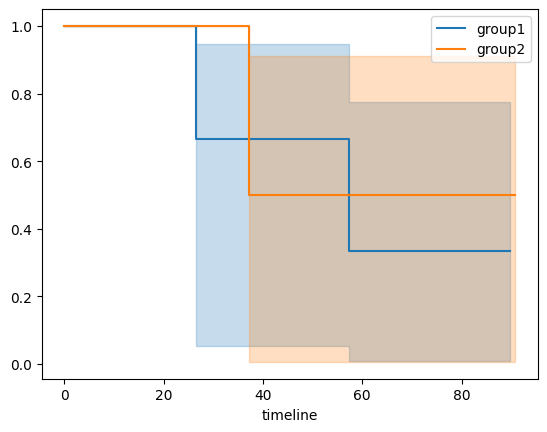

In [44]:
km1 = KaplanMeierFitter()
km_ret1 = km1.fit(df_group1.Y, df_group1.delta)
km_ret1.plot(label='group1')

km2 = KaplanMeierFitter()
km_ret2 = km2.fit(df_group2.Y, df_group2.delta)
km_ret2.plot(label='group2')

In [45]:
print(
    """
    The curve for group1 has 3 steps unlike the 2 steps of the group2.
    Moreover their probabilities after last events are different from each other.
    """
    )


    The curve for group1 has 3 steps unlike the 2 steps of the group2.
    Moreover their probabilities after last events are different from each other.
    


### 11.11(b)

In [46]:
from ISLP.models import ModelSpec as MS

In [47]:
df_data['isGroup1'] = df_data.X < 2

In [48]:
coxph = CoxPHFitter
model_df = MS(['Y','delta','isGroup1'], intercept=False).fit_transform(df_data)
cox_fit = coxph().fit(model_df, 'Y', 'delta')
cox_fit.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
isGroup1,0.340143,1.405149,1.235876,-2.082129,2.762416,0.124664,15.838061,0.0,0.275224,0.783144,0.352651


In [49]:
coef = cox_fit.summary['coef'].iloc[0]
print(
    f"""
    The esimated coefficient for the group indicator was {coef:.3e}.
    According to the proportional hazards assumption,
    we can conclude that
    the hazard function for the group whose X < 2 is
    exp(coefficient * 1) times bigger than the other group's hazard function.
    Therefore, in this case, the estimated ratio between two groups' hazard functions is
    {np.exp(coef):.3e}.
    """
    )


    The esimated coefficient for the group indicator was 3.401e-01.
    According to the proportional hazards assumption,
    we can conclude that
    the hazard function for the group whose X < 2 is
    exp(coefficient * 1) times bigger than the other group's hazard function.
    Therefore, in this case, the estimated ratio between two groups' hazard functions is
    1.405e+00.
    


In [50]:
p_value = cox_fit.summary['p'].iloc[0]
print(
    f"""
    Null: coef = 0.
    The p-value of this test is {p_value}.
    Since p > significance level, we cannot reject the null.
    Therefore, there is no statistical evidence for concluding non-zero coefficient.
    """
    )


    Null: coef = 0.
    The p-value of this test is 0.7831437750676563.
    Since p > significance level, we cannot reject the null.
    Therefore, there is no statistical evidence for concluding non-zero coefficient.
    


### 11.11(c)

In [51]:
by_X = {}
km = KaplanMeierFitter()
for isGroup1, df in df_data.groupby('isGroup1'):
    by_X[isGroup1] = df
    km_group = km.fit(df['Y'], df['delta'])

lt = logrank_test(by_X[False]['Y'],
                  by_X[True]['Y'],
                  by_X[False]['delta'],
                  by_X[True]['delta'])
lt

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35

In [52]:
print(
    f"""
    The log rank test gaves {lt.p_value}, which is almost same to the Cox model.
    Because the p-value is not that small to argue difference between two curves,
    we cannot say there is a difference between the survival curves for the two groups.
    """
    )


    The log rank test gaves 0.782176825525589, which is almost same to the Cox model.
    Because the p-value is not that small to argue difference between two curves,
    we cannot say there is a difference between the survival curves for the two groups.
    
